In [1]:
#importing lib
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [63]:
import os
os.listdir('../010160620/input/')

['.DS_Store', 'B3.tif', 'B6.tif']

In [64]:
#importing bands as band3 and band6
band3 = rasterio.open('../010160620/input/B3.tif') #green band
band6 = rasterio.open('../010160620/input/B6.tif') #swir1 band

In [65]:
#no of raster rows
band3.height

1008

In [66]:
#no of raster columns
band3.width

1008

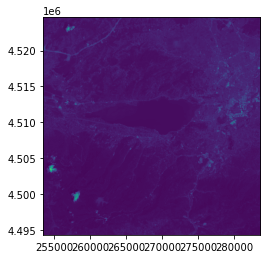

<AxesSubplot:>

In [67]:
#plotting
plot.show(band3)

In [68]:
#raster byte
band3.dtypes[0]

'uint16'

In [69]:
#raster sytem of reference
band3.crs

In [70]:
#transform parameters
band3.transform

Affine(30.0, 0.0, 253395.0,
       0.0, -30.0, 4524615.0)

In [71]:
#raster values are shown in matrix format
band3.read(1)

array([[9260, 9003, 9428, ..., 9041, 8880, 8814],
       [8919, 8950, 9477, ..., 9411, 8853, 8930],
       [8874, 8916, 9012, ..., 8768, 8672, 8761],
       ...,
       [8710, 8692, 8611, ..., 8000, 7931, 8279],
       [8670, 8639, 8604, ..., 7809, 8005, 8133],
       [8689, 8735, 8716, ..., 7876, 8516, 8149]], dtype=uint16)

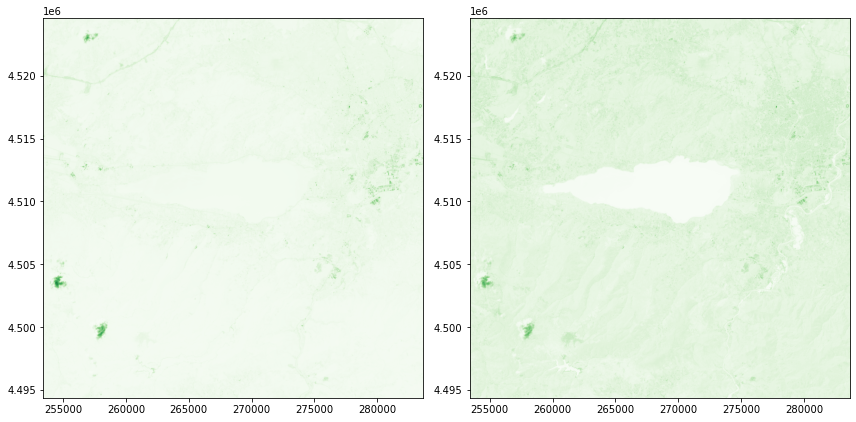

In [72]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band3, ax=ax1, cmap='Greens') #green band
plot.show(band6, ax=ax2, cmap='Greens') #swir1 band
fig.tight_layout()

In [73]:
#create swir1 and green bands as arrays with float64
green = band3.read(1).astype('float64')
swir1 = band6.read(1).astype('float64')
swir1

array([[13471., 13368., 14438., ..., 13578., 13166., 12873.],
       [12217., 12909., 14482., ..., 13718., 12945., 13323.],
       [12957., 12816., 12972., ..., 12827., 12360., 12753.],
       ...,
       [12774., 12359., 11767., ..., 12794., 13161., 14149.],
       [12650., 12240., 12345., ..., 12134., 13008., 13599.],
       [13445., 13479., 13243., ..., 12749., 14295., 13942.]])

In [74]:
#mndwi formula, empty cells presented as 0
mndwi=np.where(
    (green+swir1)==0., 
    0, 
    (green-swir1)/(green+swir1))
mndwi[:5,:5]

array([[-0.18525362, -0.19511868, -0.20992206, -0.23592658, -0.21280603],
       [-0.15603709, -0.18111533, -0.20889853, -0.18298286, -0.15743592],
       [-0.18702762, -0.17945886, -0.180131  , -0.14284324, -0.16003226],
       [-0.22477861, -0.19846202, -0.16648623, -0.14859128, -0.20207476],
       [-0.22085566, -0.22528182, -0.19407179, -0.15406853, -0.21955049]])

In [75]:
#exporting mndwi_620.tif
mndwi_620 = rasterio.open('../010160620/output/mndwi_620.tiff','w',driver='Gtiff',
                          width=band3.width, 
                          height = band3.height, 
                          count=1, crs=band3.crs, 
                          transform=band3.transform, 
                          dtype='float64')
mndwi_620.write(mndwi,1)
mndwi_620.close()

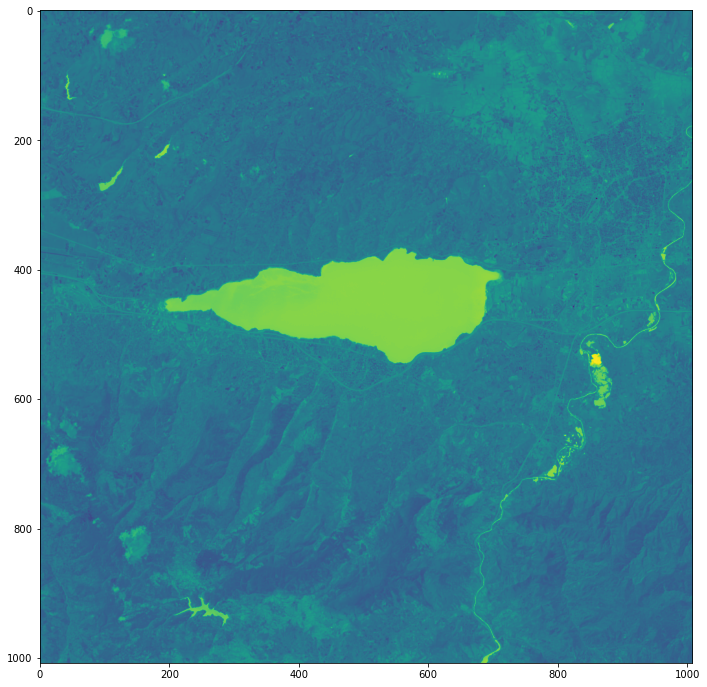

<AxesSubplot:>

In [77]:
#mndwi_620 image
mndwi_620 = rasterio.open('../010160620/output/mndwi_620.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(mndwi)